In [132]:
import numpy as np 
import matplotlib.pyplot as plt
import os
import cv2
import filetype
import tensorflow as tf

In [133]:
# 1. Halkan waxaan ka raadinaynaa haddii kombiyuutarka uu ku jiro GPU (NVIDIA)
gpus = tf.config.experimental.list_physical_devices('GPU')

# 2. Maadaama laga yaabo in hal ama wax ka badan GPU la helo, mid mid ayaan u loop-gareynaynaa
for gpu in gpus:
    # 3. Amarkan wuxuu TensorFlow u sheegayaa: "Ha wada liqin xusuusta (RAM-ka) GPU-ga hal mar,
    # balse u isticmaal tartiib-tartiib inta aad u baahato oo kaliya."
    tf.config.experimental.set_memory_growth(gpu, True)

In [134]:
data_dir = 'data' # Halkaan geli galka ay sawiradu ku jiraan
image_exts = ['jpeg', 'jpg', 'bmp', 'png']
os.listdir(data_dir)

['happy', 'sad']

In [135]:
for image_class in os.listdir(data_dir):
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try:
            # soo aqri image ka matrix ahan 10*10 width , hight ,chanels
            img = cv2.imread(image_path) 
            # soo aqri extensionka image ka 
            kind = filetype.guess(image_path)
            # print(type(img))   # Waxay kuu soo saari: <class 'numpy.ndarray'>
            # print(img.shape)   # Waxay kuu sheegi cabbirka sawirka (Height, Width, 3)

            # print(kind.extension) # Waxay kuu soo saari: 'jpg' ama 'png'
            if kind is None or kind.extension not in image_exts:
                print(f"Sawirkan waa xumaa (Extension khaldan): {image_path}")
                os.remove(image_path)
            else:
                 # Mararka qaar sawirku waa dilaacaa (corrupt), haddii 'img' uu None yahay
                if img is None:
                    print(f"Sawirkan waa dilaacsanyahay: {image_path}")
                    os.remove(image_path)
        except exception as e:
            print(f"Dhibaatadii dhacda: {e} ee sawirka {image_path}")


In [136]:
# 1. MISHIINKA URURINTA XOGTA:
# Code-kan wuxuu dhex galayaa folder-ka 'data', wuxuu iskiis u garanayaa Folder-yada (Happy/Sad),
# wuxuu sawirada u beddelayaa cabbir isku mid ah (256x256), wuxuuna u qaybiyaa koox-koox (Batches).
# Koox kasta (Batch) waxay ka kooban tahay 32 sawir (waa default-ka).
data = tf.keras.utils.image_dataset_from_directory('data')

# 2. DIYAARINTA MISHIINKA:
# Maadaama 'data' ay tahay dhuun (pipeline) weyn, waxaan u beddelnaa 'Iterator'.
# Tani waxay noo oggolaanaysaa inaan gacanteena ku soo saarno kooxaha sawirada (batches) mid-mid.
data_iterator = data.as_numpy_iterator()

# 3. SOO SAARISTA KOOXDII UGU HOREYSAY (BATCH 1):
# Halkan waxaan ku helaynaa kooxdii 1-aad ee 32-ka sawir ah.
# 'batch' hadda waa liis ka kooban laba qaybood:
# batch[0] = Waa 32 sawir oo xogtooda (pixels) ay nambaro yihiin.
# batch[1] = Waa 32 nambar (Labels) oo ah 0 ama 1 (Happy ama Sad).
batch = data_iterator.next()
# print(len(batch)): Waxay kuu soo saari 2 (maxaa yeelay waa Sawiro iyo Labels).
# print(batch[0].shape): Waxay kuu soo saari (32, 256, 256, 3) (32 sawir, cabbirka 256x256, iyo 3 midab).
# print(batch[1]): Waxay kuu soo saari liiska nambarada 0 iyo 1 ee u dhigma sawiradaas.
# batch[0] (X): Waa xogta sawirka (Pixels). Waa su'aasha computer-ka la weydiinayo: "Sawirkan maxay kula tahay?"
# batch[1] (y): Waa Label-ka. Waa jawaabta mashiinka la barayo: "Sawirkani waa Happy (0)" ama "Sawirkani waa Sad (1)".
# batch[1]' waa liis ka kooban jawaabaha (Labels).
# # Haddii nambarku yahay 0 = Waa folder-ka kowaad (tusaale: Happy)
# # Haddii nambarku yahay 1 = Waa folder-ka labaad (tusaale: Sad)
# # Mashiinku wuxuu baranayaa inuu xiriiriyo sawirka (batch[0]) iyo jawaabtiisa (batch[1]).

Found 12044 files belonging to 2 classes.


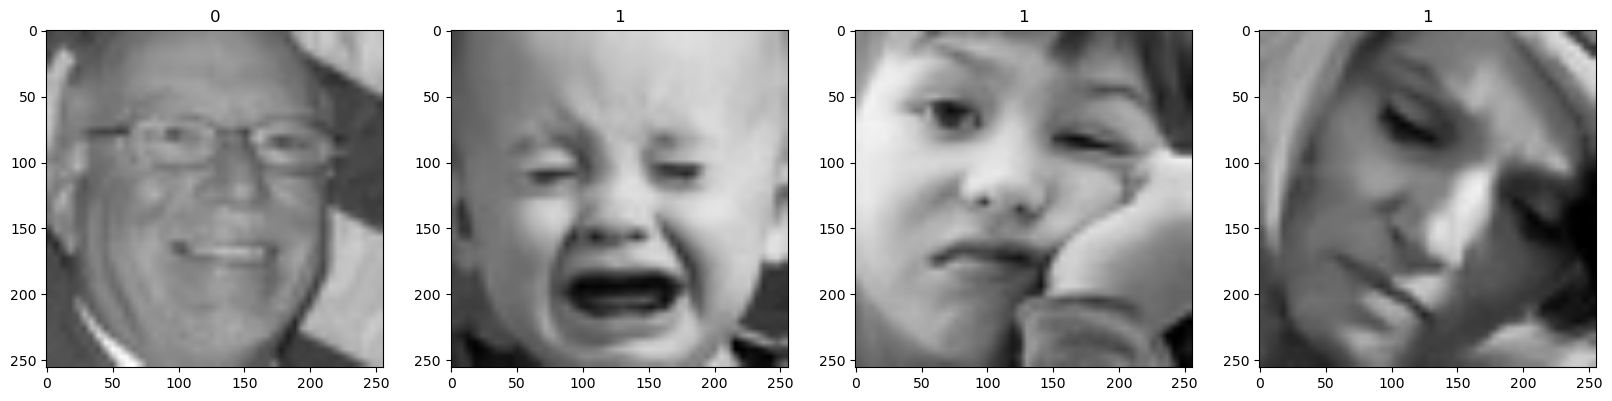

In [137]:
# fig: Waa "Waraaqda weyn" (Canvas) ee dhammaan sawirada lagu ururinayo.
# ax:  Waa "Khaanadaha" ama suxuunta mid midka ah ee sawirada lagu dhex ridayo.
# subplots: Waa function-ka inoo dhisaya qaab-dhismeedka (Layout-ka).
# ncols=4: Waxay u sheegaysaa code-ka "Ii samee 4 meelood oo is garab yaal".
# figsize=(20,20): Waa ballaca iyo dhererka waraaqda weyn (fig).
fig, ax = plt.subplots(ncols=4,figsize=(20,20))

for idx, img in enumerate(batch[0][0:4]):
    # idx (Index): Waa lambarka (0, 1, 2, 3). Waxaan u isticmaalnaa inaan ku tilmaamno khaanadda ax.
    # img (Image): Waa xogta sawirka laftiisa (Pixels).

    # so qado qanada ax add idx sawirka numbrkisa kadibne so dawac imshow
    ax[idx].imshow(img.astype(int))
    # so qado qanada ax add idx sawirka numbrkisa kadibne title uyeel 
    # kadibne lables ka so qado 0,1 batch[1][idx] sawirwalbo idx kisa ku aadi
    ax[idx].title.set_text(batch[1][idx])

plt.show()

In [138]:
# Line-kan wuxuu qabanayaa waxa loo yaqaano 'Data Scaling' ama 'Normalization'
# .map() waxay la macno tahay: "Mid-mid ugu mari shaqadan xogta oo dhan"
# lambda x, y: waxay u taagantahay (x = sawirka, y = magaca sawirka/label)

data = data.map(lambda x, y: (x/255, y))

# SHARRAXAAD KOOBAN:
# 1. (x/255): Waxaan soo qaadnay sawirkii, pixel kasta oo ku jiray ayaan u qaybinay 255.
#    Tani waxay sawirka ka dhigaysaa mid u dhexeeya 0 ilaa 1 (waa nambarka mashiinku jecelyahay).
# 2. (, y): Magaca sawirka (0 ama 1) sidoodii ayaan u deynay, waayo uma baahna wax ka bedel.

scaled_iterator = data.as_numpy_iterator()
batch = scaled_iterator.next()
batch = data.as_numpy_iterator().next()

print('min',batch[0].min()) # Waxay kuu soo saari doontaa 0.0
print('max',batch[0].max()) # Waxay kuu soo saari doontaa 1.0 (ama wax ku dhow)

min 0.0
max 1.0


In [139]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)

train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size + val_size).take(test_size) 

In [140]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

# Conv2D: Wuxuu arkaa astaamaha sawirka (Waa indhaha)

# MaxPooling: Wuxuu soo koobaa wixii muhiim ah (Waa xasuusta muhiimka ah). 
# aso doranayo numbrka ugu weyn wxi noise ehne muhim usan u arkin wu iska tuuraya

# Flatten: Wuxuu u diyaariyaa xogta sidii liis (Waa buundada go'aanka) 
# aso isku dufanaya max poling ki u dambeyey e.g 23*23*3 = 1587 1 liis 

model = Sequential()

# Layer-ka 1aad: Convolution iyo Pooling
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())

# Layer-ka 2aad: Convolution iyo Pooling
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

# Layer-ka 3aad: Convolution iyo Pooling
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

# In xogta la simo (Flatten) si loogu gudbiyo Dense layers
model.add(Flatten())

# Layer-ka u dambeeya ee go'aanka gaaraya (Fully Connected)
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5)) # Tan ku dar si aad uga hortagto overfitting
model.add(Dense(1, activation='sigmoid')) # Sigmoid waayo waa labo shay midkood (Binary)

model.compile(optimizer='adam', 
              loss='binary_crossentropy', 
              metrics=['accuracy'])

# In la arko qaab dhismeedka model-ka
model.summary()

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_24 (Conv2D)              │ (None, 254, 254, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_24 (MaxPooling2D) │ (None, 127, 127, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_25 (Conv2D)              │ (None, 125, 125, 32)   │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_25 (MaxPooling2D) │ (None, 62, 62, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_26 (Conv2D)              │ (None, 60, 60, 16)     │         4,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_26 (MaxPooling2D) │ (None, 30, 30, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_8 (Flatten)             │ (None, 14400)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 256)            │     3,686,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,696,625 (14.10 MB)

 Trainable params: 3,696,625 (14.10 MB)

 Non-trainable params: 0 (0.00 B)

In [141]:

logdir = 'logs' # Folder-ka ay galayaan natiijooyinka
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

hist = model.fit(train, 
                 epochs=10, 
                 validation_data=val, 
                 callbacks=[tensorboard_callback])

# Callbacks: Waxay u shaqeeyaan sidii warbixin (report) oo kale; 
# waxaan u isticmaalnaa kaliya inaan hadhow garaafyo (graphs) ku sawirno 
# si aan u aragno horumarka model-ka. 
# Haddii aad iska dhaafto, wax dhib ah ma leh oo model-ku si caadi ah ayuu u tababaranayaa.

Epoch 1/10
263/263 ━━━━━━━━━━━━━━━━━━━━ 130s 478ms/step - accuracy: 0.6524 - loss: 0.6210 - val_accuracy: 0.6879 - val_loss: 0.5776
Epoch 2/10
263/263 ━━━━━━━━━━━━━━━━━━━━ 122s 461ms/step - accuracy: 0.7071 - loss: 0.5523 - val_accuracy: 0.7275 - val_loss: 0.5300
Epoch 3/10
263/263 ━━━━━━━━━━━━━━━━━━━━ 122s 462ms/step - accuracy: 0.7436 - loss: 0.5038 - val_accuracy: 0.7333 - val_loss: 0.5234
Epoch 4/10
263/263 ━━━━━━━━━━━━━━━━━━━━ 120s 455ms/step - accuracy: 0.7754 - loss: 0.4577 - val_accuracy: 0.7471 - val_loss: 0.4969
Epoch 5/10
263/263 ━━━━━━━━━━━━━━━━━━━━ 120s 456ms/step - accuracy: 0.8038 - loss: 0.4128 - val_accuracy: 0.7538 - val_loss: 0.4810
Epoch 6/10
263/263 ━━━━━━━━━━━━━━━━━━━━ 121s 461ms/step - accuracy: 0.8301 - loss: 0.3621 - val_accuracy: 0.7700 - val_loss: 0.4754
Epoch 7/10
263/263 ━━━━━━━━━━━━━━━━━━━━ 121s 460ms/step - accuracy: 0.8676 - loss: 0.3013 - val_accuracy: 0.7650 - val_loss: 0.5010
Epoch 8/10
263/263 ━━━━━━━━━━━━━━━━━━━━ 120s 455ms/step - accuracy: 0.8934 -

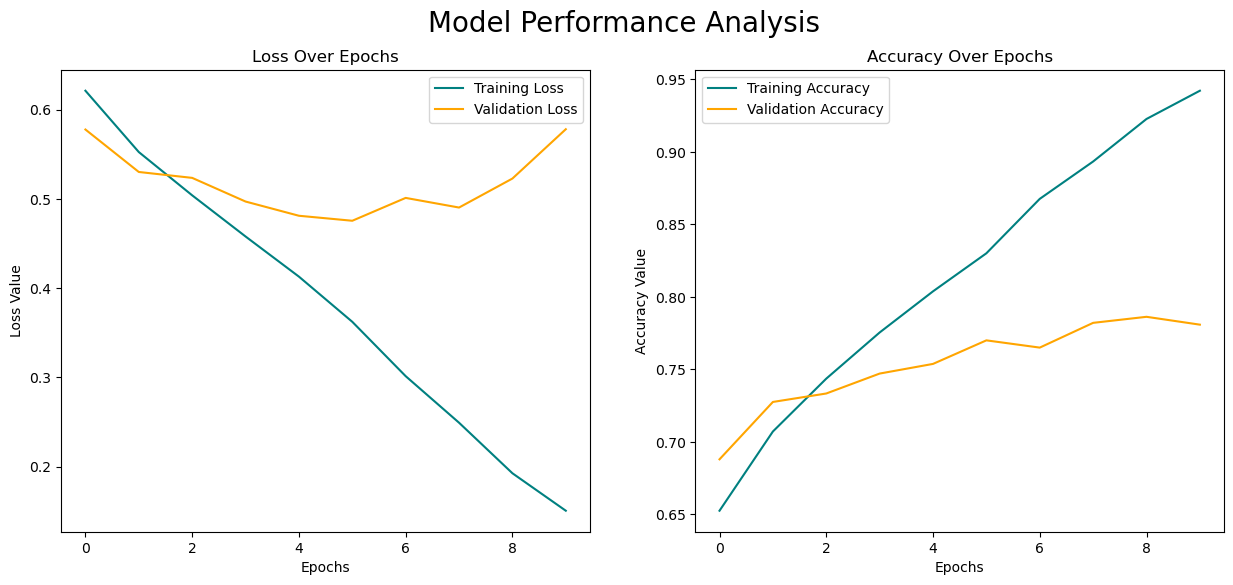

In [142]:
# ==============================================================================
# FAAHFAAHINTA WAXQABADKA MOODEELKA (VISUALIZING MODEL PERFORMANCE)
# ==============================================================================
# Halkan, waxaan ku sawireynaa laba garaaf oo is barbar yaal si aan u aragno
# sida 'Khasaaraha' (Loss) iyo 'Saxnaanta' (Accuracy) ay isu beddeleen
# intii uu tababarku socday. Tani waxay naga caawineysaa inaan fahamno
# tayada moodeelka aan tababarnay.

# --- TALLAAABADA 1: Abuurista Daaqada iyo Goobaha Garaafyada ---
# Waxaan abuuraynaa hal daaqad (fig) oo ay ku dhex jiraan laba garaaf (axes)
# oo is barbar yaal (1 saf, 2 tiir). `figsize` wuxuu xakameynayaa baaxadda daaqada.
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# --- TALLAABADA 2: Ku darista Cinwaanka Guud ---
# Waxaan daaqada oo dhan u sameyneynaa hal cinwaan weyn oo ka sarreeya labada garaaf.
fig.suptitle('Model Performance Analysis', fontsize=20)

# --- TALLAABADA 3: Sawiridda Garaafka Khasaaraha (Loss Plot) ---
# Garaafka koowaad (ax1) wuxuu muujinayaa isbeddelka khasaaraha (Training vs Validation).
ax1.plot(hist.history['loss'], color='teal', label='Training Loss')
ax1.plot(hist.history['val_loss'], color='orange', label='Validation Loss')
ax1.set_title('Loss Over Epochs')            # Cinwaanka garaafka koowaad
ax1.set_xlabel('Epochs')                     # Magaca dhidibka hoose (X-axis)
ax1.set_ylabel('Loss Value')                 # Magaca dhidibka bidix (Y-axis)
ax1.legend()

# --- TALLAABADA 4: Sawiridda Garaafka Saxnaanta (Accuracy Plot) ---
# Garaafka labaad (ax2) wuxuu muujinayaa isbeddelka saxnaanta (Training vs Validation).
ax2.plot(hist.history['accuracy'], color='teal', label='Training Accuracy')
ax2.plot(hist.history['val_accuracy'], color='orange', label='Validation Accuracy')
ax2.set_title('Accuracy Over Epochs')        # Cinwaanka garaafka labaad
ax2.set_xlabel('Epochs')                     # Magaca dhidibka hoose (X-axis)
ax2.set_ylabel('Accuracy Value')             # Magaca dhidibka bidix (Y-axis)
ax2.legend()

# --- TALLAABADA 5: Soo Bandhigidda Garaafyada ---
# Ugu dambeyn, waxaan soo saareynaa garaafyada si aan u aragno natiijada.
plt.show()

In [143]:
# Waxaan isticmaaleynaa cabbiro kala duwan si aan u helno faham buuxa
# oo ku saabsan waxqabadka moodeelka marka la eego xogta imtixaanka (test data).

# --- TALLAABADA 1: Soo Dejinta Cabbirada (Importing Metrics) ---
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

# --- TALLAABADA 2: Abuurista Cabbir Walba ---

# Precision(): Wuxuu cabbiraa saxnaanta saadaasha wanaagsan.
# Su'aasha uu ka jawaabo: "Markii uu moodeelku yiri 'Sad', imisa jeer ayuu run sheegay?"
# Wuxuu muhiim u yahay in laga fogaado saadaal qaldan (False Positives).
pre = Precision()

# Recall(): Wuxuu cabbiraa awoodda soo qabashada dhammaan kiisaska dhabta ah.
# Su'aasha uu ka jawaabo: "Dhammaan sawirradii 'Sad' ee dhabta ahaa, intee in le'eg ayuu soo helay?"
# Wuxuu muhiim u yahay si aan loo seegin kiisas muhiim ah (False Negatives).
re = Recall()

# BinaryAccuracy(): Wuxuu cabbiraa saxnaanta guud.
# Su'aasha uu ka jawaabo: "Boqolkiiba intee ayuu moodeelku sax ahaa guud ahaan?"
# Wuxuu bixiyaa aragti guud oo degdeg ah.
acc = BinaryAccuracy()

In [144]:
# Marka hore nadiifi xisaabta (Reset Metrics)
# pre.reset_state()
# re.reset_state()
# acc.reset_state()

# Kadib wad Loop-ka
for batch in test.as_numpy_iterator():
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)
# U wareeg xogta 'test' qayb-qayb (batch) oo loo badalay qaab NumPy ah
for batch in test.as_numpy_iterator():

    # Kala bixi xirmada: X waa sawirada, y waa jawaabaha saxda ah (Labels)
    X, y = batch

    # Model-ku ha saadaaliyo jawaabta sawiradaas (X), natiijada waa yhat
    yhat = model.predict(X)

    # Xisaabi 'Pre,re,acc' adigoo isbarbardhigaya jawaabta saxda ah (y) iyo saadaasha (yhat)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)


print(f'Precision: {pre.result().numpy()}')
print(f'Recall: {re.result().numpy()}')
print(f'Accuracy: {acc.result().numpy()}')

 # --- PRECISION (Hubinta / Run-sheegnimada) ---
    # Su'aasha: "Markuu yiraahdo 'waa Happy', ma runbaa?"
    # 1.0 (100%): Waa Hubaal. Wixii aan Happy ku sheegay waa wada Happy.
    # 0.5 (50%):  Waa Shaki. Nus kamid ah waxaan ku sheegay Happy lkn waa Sad.
    # 0.2 (20%):  Waa Been. Inta badan waxaan iska iri waa Happy lkn waa Sad.

 # --- RECALL (Soo-helidda / Baadigoobka) ---
    # Su'aasha: "Happy-gii jiray oo dhan ma soo wada helnay?"
    # 1.0 (100%): Waan wada helay. Midna igama dhuuman.
    # 0.5 (50%):  Nusbaa iga dhumay. Happy badan baan arki waayey (waxaan mooday Sad).
    # 0.2 (20%):  Inta badan waa dhumeyn. Happy yar unbaan arkay.

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 509ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 166ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 157ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 165ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 183ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 165ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 161ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 164ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 167ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 167ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 165ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 166ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 165ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 170ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 172ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 178ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 176ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 162ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 187ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 

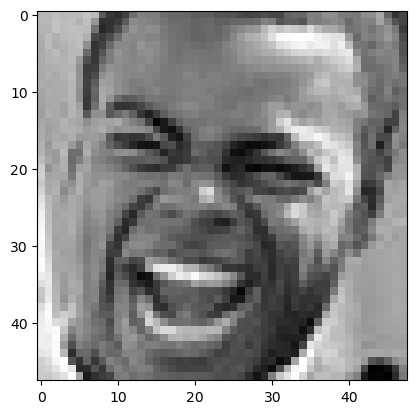

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
RAW PREDICTION VALUE: [[0.05506665]]
Natiijada la saadaaliyay waa: Happy


In [146]:
import cv2
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# 1. Sawirka ka soo akhri computer-ka
img = cv2.imread('happy1.jpg') 

# 2. Bedel midabka sawirka (BGR to RGB) waayo OpenCV sawirka waxay u akhridaa si khaldan (BGR)
# Matplotlib-na waxay u baahan tahay RGB si midabada saxda ah u muuqdaan
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB)) 
plt.show()

# 3. Sawirka ka dhig cabbirka 256x256 (Resize)
# Sababta: Model-kaagu wuxuu u tababaran yahay cabbirkan, markaa waa in sawir kasta la egaysiiyaa
resize = tf.image.resize(img, (256,256))

# np.expand_dims(..., 0) waxay sawirka ka dhigaysaa (1, 256, 256, 3)
# 1-daas horteeda timid waxaa loo yaqaannaa: BATCH SIZE

yhat = model.predict(np.expand_dims(resize/255, 0))
print(f"RAW PREDICTION VALUE: {yhat}")
# 1-daas waxay Model-ka u sheegaysaa:
# "Waxaa kuu soo socda HAL koox (1 Batch), kooxdaasna waxaa ku dhex jira HAL sawir oo kaliya."

# Haddii ay ahaan lahayd (32, 256, 256, 3):
# Model-ku wuxuu u faham lahaa: "Waxaa kuu soo socda 32 sawir oo isku duuban."

# 5. Soo saar natiijada (Natiijadu waxay u dhaxaysaa 0 ilaa 1)
if yhat > 0.5:
    print(f'Natiijada la saadaaliyay waa: Sad')  # Haddii ay ka weyn tahay 0.5 waa murugo
else:
    print(f'Natiijada la saadaaliyay waa: Happy') # Haddii ay ka yar tahay waa farxad

In [147]:
model.save('models/happysadmodel.h5')